In [2]:
import pandas as pd
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
...,...,...,...,...,...,...,...
3465,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,71396.593750,59594605698
3466,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,69403.773438,78320453976
3467,2024-03-16,69392.484375,70046.273438,64801.394531,65315.117188,65315.117188,46842198371
3468,2024-03-17,65316.343750,68845.718750,64545.316406,68390.625000,68390.625000,44716864318


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3465,2024-03-14,71396.593750
3466,2024-03-15,69403.773438
3467,2024-03-16,65315.117188
3468,2024-03-17,68390.625000


In [4]:
df['Date']

,Date
0,2014-09-18
1,2014-09-19
2,2014-09-20
3,2014-09-21
4,2014-09-22
...,...
3465,2024-03-14
3466,2024-03-15
3467,2024-03-16
3468,2024-03-17


In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3465,2024-03-14,71396.593750
3466,2024-03-15,69403.773438
3467,2024-03-16,65315.117188
3468,2024-03-17,68390.625000


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2014-09-18
1,2014-09-19
2,2014-09-20
3,2014-09-21
4,2014-09-22
...,...
3465,2024-03-14
3466,2024-03-15
3467,2024-03-16
3468,2024-03-17


In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
...,...
2024-03-14,71396.593750
2024-03-15,69403.773438
2024-03-16,65315.117188


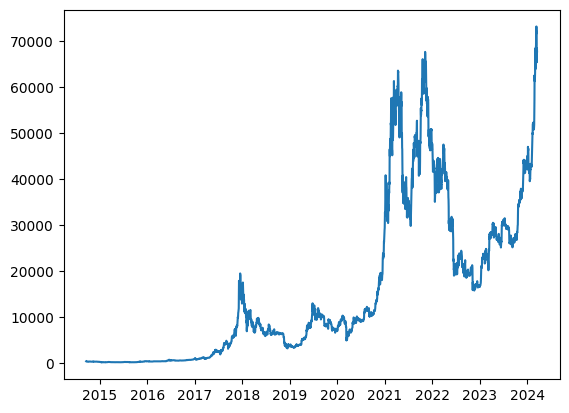

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2014-09-24',
                                '2024-03-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2014-09-24,398.821014,402.152008,435.790985,423.204987
1,2014-09-25,402.152008,435.790985,423.204987,411.574005
2,2014-09-26,435.790985,423.204987,411.574005,404.424988
3,2014-09-27,423.204987,411.574005,404.424988,399.519989
4,2014-09-28,411.574005,404.424988,399.519989,377.181000
...,...,...,...,...,...
3458,2024-03-13,69019.789063,72123.906250,71481.289063,73083.500000
3459,2024-03-14,72123.906250,71481.289063,73083.500000,71396.593750
3460,2024-03-15,71481.289063,73083.500000,71396.593750,69403.773438
3461,2024-03-16,73083.500000,71396.593750,69403.773438,65315.117188


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3463,), (3463, 3, 1), (3463,))

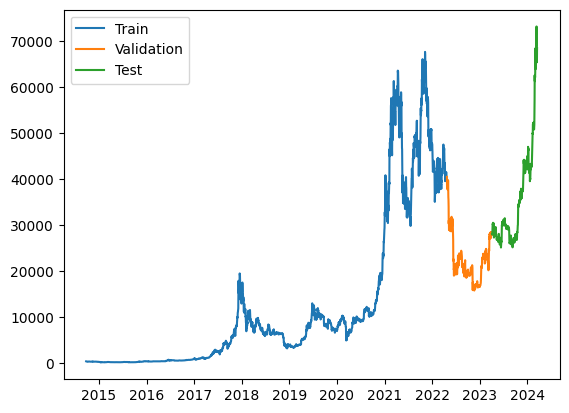

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model=Sequential()

model.add(layers.LSTM(10,input_shape=(None,1),activation="relu"))

model.add(layers.Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 416269632.0000 - val_loss: 1362613248.0000
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 381211328.0000 - val_loss: 1362607232.0000
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 424980288.0000 - val_loss: 1362601344.0000
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 414918976.0000 - val_loss: 1362595200.0000
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 430897952.0000 - val_loss: 1362589184.0000
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 427130752.0000 - val_loss: 1362583296.0000
Epoch 7/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 418624832.0000 - val_loss: 1362577536.0000
Epoch 8/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 435927456.0000 - val_loss: 1362571264.0000
Epoch 9/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 406554240.0000 - val_loss: 1362565504.0000
Epoch 10/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 435607520.0000 - val_l

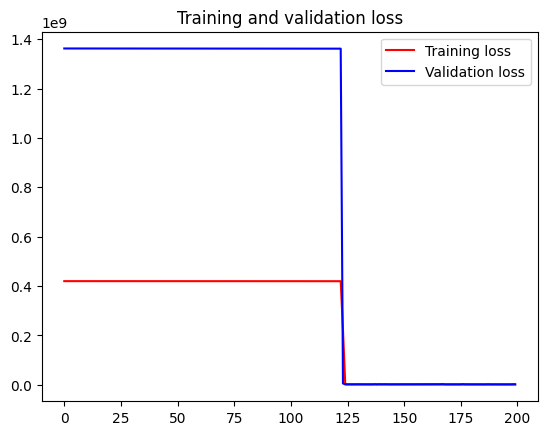

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


((2770, 1), (347, 1))

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [18]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  66681465.00316885
Train data MSE:  4446417800000000.0
Train data MAE:  30750970.0
-------------------------------------------------------------------------------------
Test data RMSE:  83538187.40942736
Test data MSE:  6978629000000000.0
Test data MAE:  51259380.0


In [19]:
print("Train data explained variance regression score:",explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.99644535779953
Test data explained variance regression score: 0.9875231981277466


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


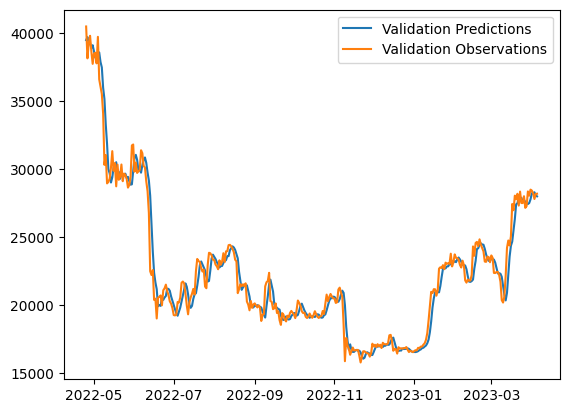

In [20]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


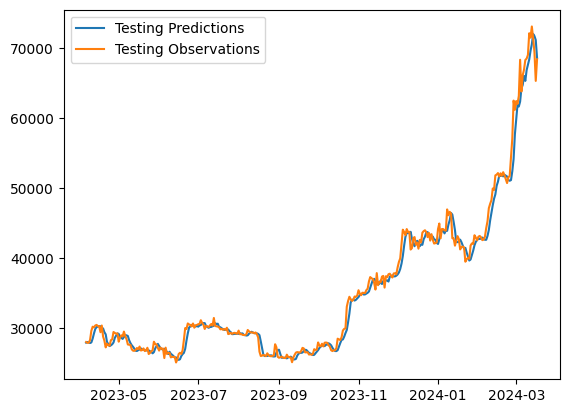

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


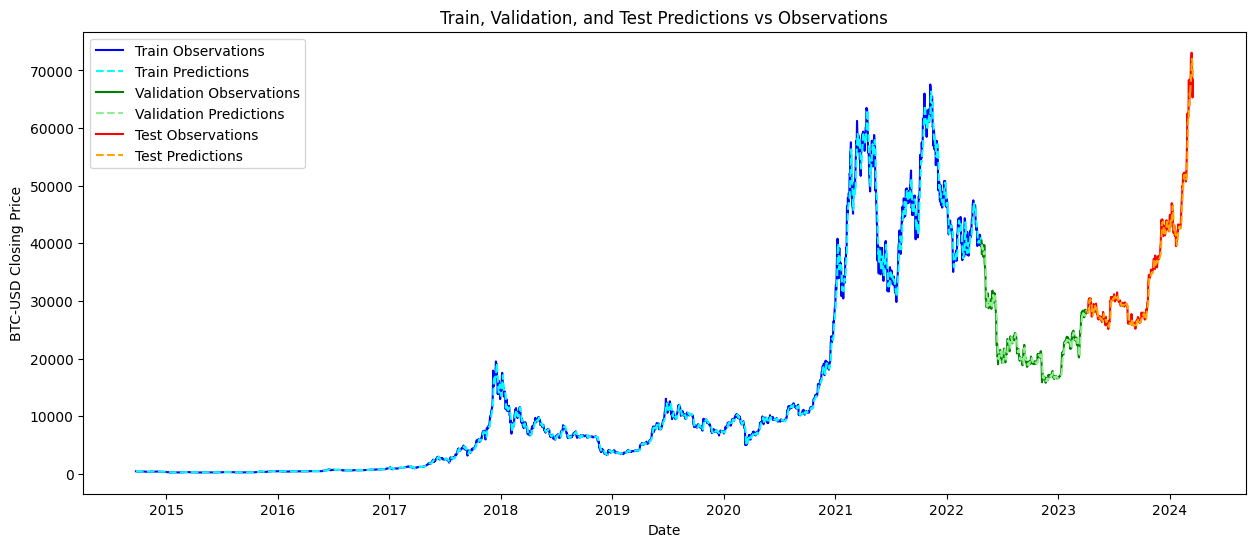

In [23]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(15, 6))
plt.plot(dates_train, y_train, label='Train Observations', color='blue')
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions, label='Train Predictions', color='cyan', linestyle='dashed')

# Plot the validation data
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, y_val, label='Validation Observations', color='green')
plt.plot(dates_val, val_predictions, label='Validation Predictions', color='lightgreen', linestyle='dashed')

# Plot the test data
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, y_test, label='Test Observations', color='red')
plt.plot(dates_test, test_predictions, label='Test Predictions', color='orange', linestyle='dashed')

# Add labels and legend
plt.title('Train, Validation, and Test Predictions vs Observations')
plt.xlabel('Date')
plt.ylabel('BTC-USD Closing Price')
plt.legend()
plt.show()
